In [1]:
import pandas as pd
import numpy as np
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.filterwarnings('ignore')

In [2]:
pubs_data = pd.read_csv("/content/data-tidying-pubs-data.csv", index_col=[0])

In [3]:
pubs_data.head()

,name,postcode,borough,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police
0,The Black Horse,EN5 4BW,London Borough of Barnet,51.653075,-0.206657,1.0,8.1,0.939551,30,0,2.0,904.722178,390.281423,0,1
1,Ye Olde Mitre Inne,EN5 5SJ,London Borough of Barnet,51.652979,-0.199367,1.0,7.6,0.982768,45,1,3.0,443.945965,119.561106,1,1
2,The Arkley,EN5 3EP,London Borough of Barnet,51.652533,-0.219573,1.0,7.7,0.987375,2,0,0.0,1767.173867,1215.815963,0,0
3,Railway Tavern,EN4 8RR,London Borough of Barnet,51.650059,-0.174692,1.0,7.4,0.950895,64,0,0.0,1343.248049,1149.621255,0,0
4,The Kings Head,EN5 5SN,London Borough of Barnet,51.653499,-0.200979,1.0,6.6,0.377777,40,0,3.0,568.292759,98.112834,0,1


In [4]:
pubs_data.shape

(859, 15)

In [5]:
pubs_data[["price", "rating", "popularity", "number_of_crimes", "number_of_metro", "number_of_police", "distance_metro", "distance_police","metro", "police"]].describe()

,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,1.194412,7.088941,0.953426,149.792782,0.589057,0.915017,1579.544088,660.523322,0.467986,0.484284
std,0.432552,0.964223,0.079735,147.283036,0.841755,1.255661,2543.966835,556.030765,0.499265,0.500044
min,1.000000,5.000000,0.021534,0.000000,0.000000,0.000000,12.398525,6.529719,0.000000,0.000000
25%,1.000000,6.300000,0.950180,65.000000,0.000000,0.000000,252.509892,280.294959,0.000000,0.000000
50%,1.000000,7.100000,0.968150,120.000000,0.000000,0.000000,550.067018,515.353936,0.000000,0.000000
75%,1.000000,7.900000,0.982230,189.500000,1.000000,1.000000,1607.831028,867.240512,1.000000,1.000000
max,3.000000,9.400000,0.998820,1271.000000,5.000000,6.000000,16421.666549,4450.039902,1.000000,1.000000


In [6]:
pubs_data[["price", "rating", "popularity", "number_of_crimes", "metro", "police"]].corr()

,price,rating,popularity,number_of_crimes,metro,police
price,1.000000,0.241572,0.124505,0.203373,0.182665,0.070721
rating,0.241572,1.000000,0.157893,-0.020165,-0.063078,-0.079769
popularity,0.124505,0.157893,1.000000,0.103772,0.138168,-0.009793
number_of_crimes,0.203373,-0.020165,0.103772,1.000000,0.374413,0.321621
metro,0.182665,-0.063078,0.138168,0.374413,1.000000,0.258249
police,0.070721,-0.079769,-0.009793,0.321621,0.258249,1.000000


## features: rating, popularity, number_of_crimes, metro, police

In [7]:
features = pubs_data[["rating", "popularity", "number_of_crimes", "metro", "police"]]

In [8]:
scaler = StandardScaler()

In [9]:
pubs = scaler.fit_transform(features)
pubs_scaled = pd.DataFrame(pubs, columns=features.columns)

### PCA

In [11]:
from yellowbrick.features import PCA

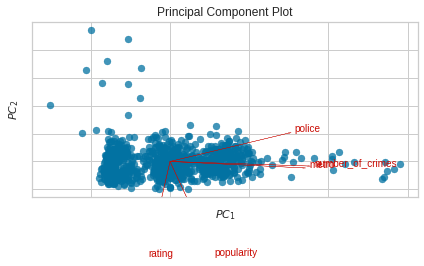

In [12]:
visualizer = PCA(proj_features=True)
visualizer.fit_transform(pubs_scaled)
visualizer.show()

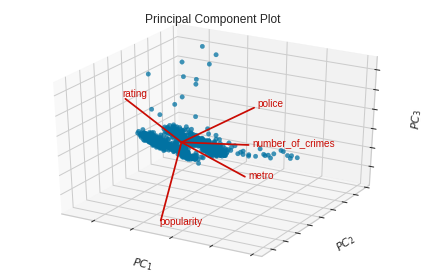

In [13]:
visualizer = PCA(proj_features=True, projection=3)
visualizer.fit_transform(pubs_scaled)
visualizer.show()

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
pca.fit(pubs_scaled)

PCA()

In [16]:
pca.explained_variance_

array([1.67465414, 1.17804663, 0.84273465, 0.70152275, 0.60886933])

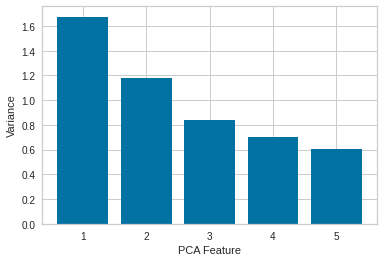

In [18]:
plt.bar(range(1, 6), pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.xticks(range(1, 6))
plt.show()

In [19]:
pca.explained_variance_ratio_

array([0.33454092, 0.23533504, 0.16835072, 0.14014122, 0.1216321 ])

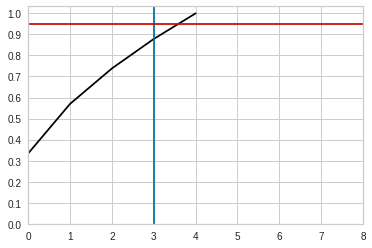

In [21]:
plt.plot( np.cumsum(pca.explained_variance_ratio_), color='black')
plt.xlim(0,8)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3, c='b')
plt.axhline(0.95, c='r')
plt.show()

### KMeans

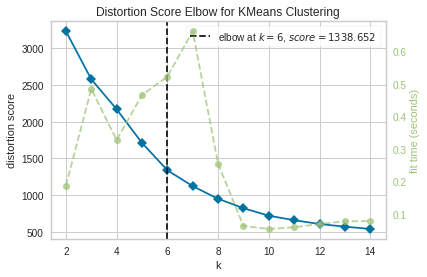

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(pubs_scaled) 
visualizer.show()

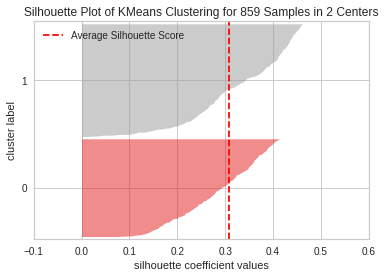

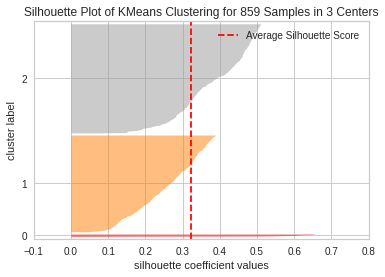

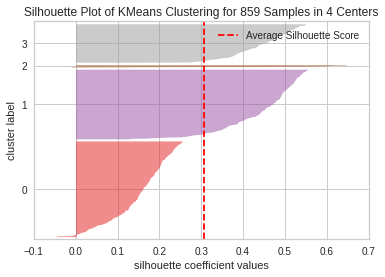

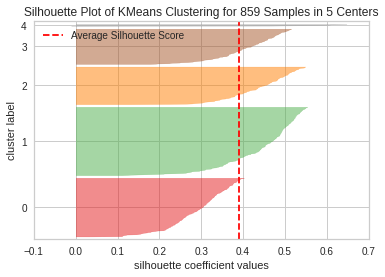

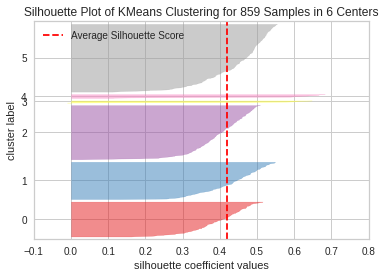

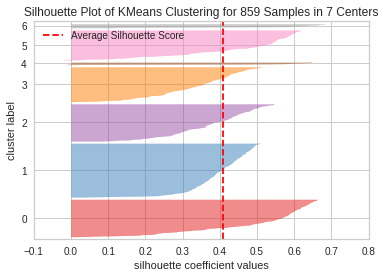

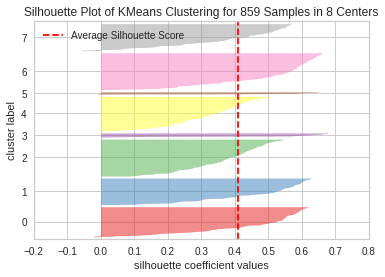

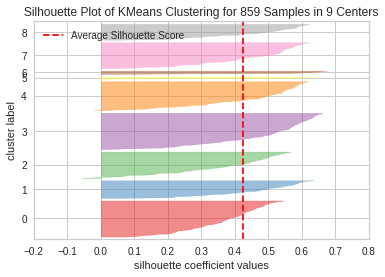

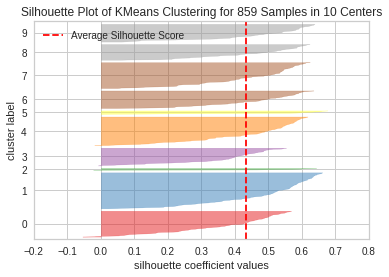

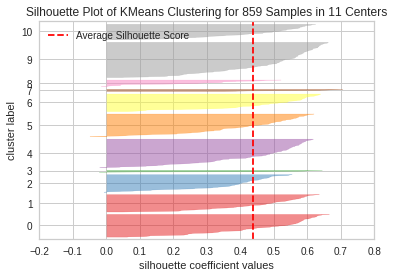

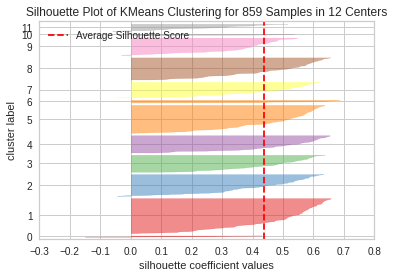

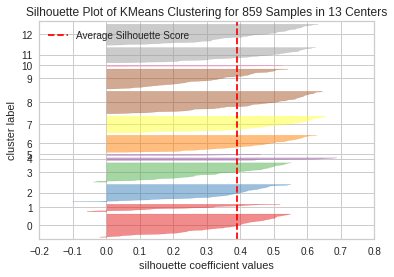

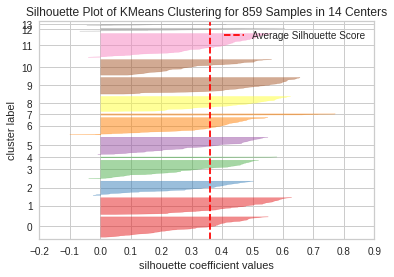

In [11]:
for i in range(2,15):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(pubs_scaled)
  yellow_visualizer.show()

### Kmeans with 6 clusters

In [12]:
model = KMeans(6)
clusters = model.fit_predict(pubs_scaled)

In [13]:
pubs_data["cluster_6k"] = clusters

In [14]:
pubs_data["cluster_6k"].value_counts()

3    290
2    232
1    160
0    150
5     17
4     10
Name: cluster_6k, dtype: int64

In [15]:
pubs_data.groupby("cluster_6k").median()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police
cluster_6k,,,,,,,,,,,,
0,51.519941,-0.135563,1.0,7.20,0.973257,142.5,1.0,0.0,249.952101,739.076292,1.0,0.0
1,51.473593,-0.153114,1.0,7.05,0.961816,117.5,0.0,1.0,1607.831028,290.694700,0.0,1.0
2,51.515511,-0.135928,1.0,7.00,0.978366,178.0,1.0,2.0,229.584262,258.942191,1.0,1.0
3,51.486922,-0.107438,1.0,7.30,0.960448,64.5,0.0,0.0,1522.731850,927.006900,0.0,0.0
4,51.506076,-0.156935,1.0,6.35,0.309577,113.5,0.0,1.5,1328.105362,342.224423,0.0,1.0
5,51.511277,-0.131253,1.0,6.90,0.985936,886.0,3.0,2.0,243.029055,273.942381,1.0,1.0


In [16]:
# average rating, popular, medium crime rate, close to metro and police (best group for 6k)
pubs_data[pubs_data["cluster_6k"] == 2].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0,232.0,232.0
mean,51.514992,-0.145263,1.284483,6.981466,0.970855,195.099138,1.271552,2.163793,242.120620,266.579770,1.0,1.0,2.0
std,0.033888,0.082486,0.497718,0.971967,0.028010,98.649028,0.805533,1.357640,129.846283,124.176270,0.0,0.0,0.0
min,51.402421,-0.480747,1.000000,5.000000,0.766158,9.000000,0.000000,1.000000,12.649932,6.529719,1.0,1.0,2.0
25%,51.498897,-0.192973,1.000000,6.275000,0.964387,120.000000,1.000000,1.000000,135.207685,166.721271,1.0,1.0,2.0
50%,51.515511,-0.135928,1.000000,7.000000,0.978366,178.000000,1.000000,2.000000,229.584262,258.942191,1.0,1.0,2.0
75%,51.532020,-0.103153,2.000000,7.800000,0.986878,246.500000,2.000000,3.000000,352.226913,375.744804,1.0,1.0,2.0
max,51.652979,0.028148,3.000000,9.000000,0.998820,552.000000,5.000000,6.000000,497.248523,498.116213,1.0,1.0,2.0


In [22]:
# good rating, popular, average crime rate, close to metro, far from police
pubs_data[pubs_data["cluster_6k"] == 0].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.0,150.0,150.0,150.000000
mean,51.520709,-0.140340,1.253333,7.116667,0.967187,149.193333,1.033333,0.0,253.966035,842.595428,1.0,0.0,0.0,6.420000
std,0.038468,0.091652,0.494081,1.025344,0.024955,82.680731,0.708687,0.0,126.849336,352.124363,0.0,0.0,0.0,1.502883
min,51.413675,-0.444744,1.000000,5.000000,0.858168,22.000000,0.000000,0.0,12.398525,502.405456,1.0,0.0,0.0,5.000000
25%,51.501883,-0.190917,1.000000,6.300000,0.960011,90.000000,1.000000,0.0,143.414057,603.239705,1.0,0.0,0.0,5.000000
50%,51.519941,-0.135563,1.000000,7.200000,0.973257,142.500000,1.000000,0.0,249.952101,739.076292,1.0,0.0,0.0,5.000000
75%,51.546076,-0.073088,1.000000,7.900000,0.984481,200.000000,1.000000,0.0,358.114722,918.926804,1.0,0.0,0.0,8.000000
max,51.608727,0.070939,3.000000,9.400000,0.998417,467.000000,4.000000,0.0,487.255681,3032.167296,1.0,0.0,0.0,8.000000


In [23]:
# good rating, popular, low crime rate, far from metro, close to police
pubs_data[pubs_data["cluster_6k"] == 1].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.0,160.0,160.0,160.000000
mean,51.477291,-0.147999,1.125000,7.081250,0.952409,128.71875,0.043750,1.456250,2742.800641,278.364373,0.0,1.0,1.0,5.468750
std,0.070510,0.122093,0.350202,0.900956,0.036842,71.58565,0.259338,0.707968,2923.396373,133.668530,0.0,0.0,0.0,3.526935
min,51.351319,-0.484815,1.000000,5.000000,0.707070,9.00000,0.000000,1.000000,500.221775,6.657322,0.0,1.0,1.0,2.000000
25%,51.434430,-0.220976,1.000000,6.400000,0.940125,78.75000,0.000000,1.000000,711.428330,152.561573,0.0,1.0,1.0,2.000000
50%,51.473593,-0.153114,1.000000,7.050000,0.961816,117.50000,0.000000,1.000000,1607.831028,290.694700,0.0,1.0,1.0,2.000000
75%,51.511783,-0.074310,1.000000,7.825000,0.977543,165.25000,0.000000,2.000000,3776.466610,394.339680,0.0,1.0,1.0,9.000000
max,51.659445,0.152618,3.000000,8.800000,0.996254,378.00000,2.000000,4.000000,16421.666549,493.392791,0.0,1.0,1.0,11.000000


In [24]:
# good rating, popular, low crime rate, far from metro and police
pubs_data[pubs_data["cluster_6k"] == 3].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,290.0,290.0,290.000000
mean,51.494799,-0.131118,1.120690,7.196207,0.953398,80.744828,0.024138,0.003448,2753.691319,1115.460817,0.0,0.0,3.0,6.772414
std,0.072099,0.135730,0.356724,0.956793,0.035893,63.454616,0.153743,0.058722,3118.185450,614.337151,0.0,0.0,0.0,4.370782
min,51.343858,-0.488453,1.000000,5.000000,0.673600,0.000000,0.000000,0.000000,500.452525,502.840084,0.0,0.0,3.0,1.000000
25%,51.450077,-0.227760,1.000000,6.400000,0.940843,35.000000,0.000000,0.000000,826.967843,713.607769,0.0,0.0,3.0,1.000000
50%,51.486922,-0.107438,1.000000,7.300000,0.960448,64.500000,0.000000,0.000000,1522.731850,927.006900,0.0,0.0,3.0,7.000000
75%,51.544239,-0.033030,1.000000,8.000000,0.975527,111.500000,0.000000,0.000000,3224.176410,1295.865389,0.0,0.0,3.0,12.000000
max,51.671260,0.177927,3.000000,9.300000,0.995076,447.000000,1.000000,1.000000,15539.261192,4450.039902,0.0,0.0,3.0,12.000000


In [25]:
# low rating, low popularity, low crime, far from metro and police
pubs_data[pubs_data["cluster_6k"] == 4].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,10.000000,10.000000,10.0,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,51.515860,-0.145266,1.0,6.37000,0.308552,116.400000,0.300000,1.30000,2125.192190,672.363523,0.300000,0.700000,4.0,4.600000
std,0.115617,0.090570,0.0,0.95458,0.188178,94.164395,0.483046,1.05935,2326.900612,666.432738,0.483046,0.483046,0.0,3.373096
min,51.360871,-0.301737,1.0,5.20000,0.021534,10.000000,0.000000,0.00000,173.653042,98.112834,0.000000,0.000000,4.0,3.000000
25%,51.428033,-0.201271,1.0,5.52500,0.198067,53.500000,0.000000,0.25000,385.888672,240.131178,0.000000,0.250000,4.0,3.000000
50%,51.506076,-0.156935,1.0,6.35000,0.309577,113.500000,0.000000,1.50000,1328.105362,342.224423,0.000000,1.000000,4.0,3.000000
75%,51.634159,-0.086421,1.0,7.02500,0.409116,142.000000,0.750000,2.00000,3107.513626,1127.623840,0.750000,1.000000,4.0,3.000000
max,51.658291,-0.021854,1.0,8.20000,0.593970,339.000000,1.000000,3.00000,7248.088129,1759.831724,1.000000,1.000000,4.0,11.000000


In [26]:
# average rating, popular, high crime rate, close to metro and police
pubs_data[pubs_data["cluster_6k"] == 5].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.0,17.0,17.000000
mean,51.512002,-0.130501,1.470588,6.976471,0.983539,932.647059,2.294118,2.176471,228.880890,259.302427,1.0,1.0,5.0,7.647059
std,0.001786,0.005337,0.514496,0.769358,0.007367,240.756864,1.490164,1.424574,71.174642,116.909596,0.0,0.0,0.0,2.029199
min,51.509578,-0.139495,1.000000,5.900000,0.970350,605.000000,0.000000,1.000000,107.695628,78.674705,1.0,1.0,5.0,6.000000
25%,51.510587,-0.133094,1.000000,6.400000,0.976846,724.000000,1.000000,1.000000,170.359494,183.009921,1.0,1.0,5.0,6.000000
50%,51.511277,-0.131253,1.000000,6.900000,0.985936,886.000000,3.000000,2.000000,243.029055,273.942381,1.0,1.0,5.0,6.000000
75%,51.513917,-0.125622,2.000000,7.400000,0.989137,1188.000000,4.000000,4.000000,273.097343,314.215393,1.0,1.0,5.0,10.000000
max,51.515128,-0.122778,2.000000,8.300000,0.995409,1271.000000,4.000000,5.000000,349.913252,498.724304,1.0,1.0,5.0,10.000000


### KMeans with 14 clusters

In [17]:
model = KMeans(14)
clusters = model.fit_predict(pubs_scaled)

In [18]:
pubs_data["cluster_nk"] = clusters

In [19]:
pubs_data["cluster_nk"].value_counts()

7     107
0     101
12     92
1      89
2      81
5      79
9      78
13     74
8      71
4      50
10     13
6      10
3       8
11      6
Name: cluster_nk, dtype: int64

In [20]:
pubs_data.groupby("cluster_nk").median()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k
cluster_nk,,,,,,,,,,,,,
0,51.516534,-0.141218,1.0,6.10,0.977500,182.0,1.0,2.0,197.401961,258.868624,1.0,1.0,2.0
1,51.465651,-0.096573,1.0,6.20,0.946877,63.0,0.0,0.0,1917.847109,1097.002704,0.0,0.0,3.0
2,51.460702,-0.156006,1.0,6.40,0.954264,123.0,0.0,1.0,2232.080063,292.590412,0.0,1.0,1.0
3,51.476349,-0.196580,1.0,6.35,0.228586,113.5,0.0,1.5,1424.825704,342.224423,0.0,1.0,4.0
4,51.519148,-0.120730,1.0,8.00,0.983019,263.0,1.0,2.0,249.183413,225.320456,1.0,1.0,2.0
5,51.520232,-0.146113,1.0,7.90,0.971989,120.0,1.0,0.0,281.152867,746.144834,1.0,0.0,0.0
6,51.511703,-0.132243,2.0,7.10,0.988980,1180.5,1.5,1.0,222.874411,293.351662,1.0,1.0,5.0
7,51.496846,-0.090784,1.0,8.10,0.968355,83.0,0.0,0.0,1037.425987,855.677630,0.0,0.0,3.0
8,51.519907,-0.132049,1.0,6.20,0.973549,163.0,1.0,0.0,239.182878,738.525053,1.0,0.0,0.0


In [21]:
# high rating, popular, low crime, close to metro and police (best group)
pubs_data[pubs_data["cluster_nk"] == 13].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.0,74.0,74.0
mean,51.515711,-0.149984,1.283784,7.627027,0.969209,123.797297,1.013514,2.013514,273.392806,282.390473,1.0,1.0,2.0,13.0
std,0.037263,0.083297,0.510715,0.489701,0.023156,44.420463,0.561145,1.164465,136.274150,131.723345,0.0,0.0,0.0,0.0
min,51.421828,-0.479655,1.000000,6.800000,0.852511,32.000000,0.000000,1.000000,38.663651,23.235457,1.0,1.0,2.0,13.0
25%,51.497046,-0.199184,1.000000,7.225000,0.963037,91.250000,1.000000,1.000000,157.389396,163.737215,1.0,1.0,2.0,13.0
50%,51.512345,-0.135788,1.000000,7.600000,0.974736,119.500000,1.000000,2.000000,270.809020,287.811606,1.0,1.0,2.0,13.0
75%,51.541394,-0.110569,1.750000,7.900000,0.983113,159.500000,1.000000,2.000000,393.298371,402.947131,1.0,1.0,2.0,13.0
max,51.652979,0.028148,3.000000,8.900000,0.998820,225.000000,3.000000,6.000000,494.564837,498.116213,1.0,1.0,2.0,13.0


In [28]:
# good rating, popular, high crime, close to metro and police (highest crime rate)
pubs_data[pubs_data["cluster_nk"] == 6].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0
mean,51.512086,-0.131948,1.600000,7.190000,0.984798,1095.300000,1.900000,1.900000,222.290513,283.904251,1.0,1.0,5.0,6.0
std,0.001793,0.003481,0.516398,0.723341,0.008269,155.900289,1.286684,1.449138,76.175389,112.011515,0.0,0.0,0.0,0.0
min,51.509578,-0.137315,1.000000,5.900000,0.970350,877.000000,0.000000,1.000000,107.695628,99.481875,1.0,1.0,5.0,6.0
25%,51.510812,-0.132912,1.000000,6.825000,0.979032,942.750000,1.000000,1.000000,178.862640,233.379982,1.0,1.0,5.0,6.0
50%,51.511703,-0.132243,2.000000,7.100000,0.988980,1180.500000,1.500000,1.000000,222.874411,293.351662,1.0,1.0,5.0,6.0
75%,51.513576,-0.130320,2.000000,7.625000,0.989459,1199.750000,3.000000,2.000000,259.202931,310.792036,1.0,1.0,5.0,6.0
max,51.515128,-0.126760,2.000000,8.300000,0.995409,1271.000000,4.000000,5.000000,349.913252,498.724304,1.0,1.0,5.0,6.0


In [30]:
# low rating, popular, medium crime rate, close to metro and police
pubs_data[pubs_data["cluster_nk"] == 0].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.0,101.0,101.0
mean,51.511552,-0.155540,1.217822,6.069307,0.970235,188.712871,1.336634,2.108911,209.827214,266.826003,1.0,1.0,2.0,0.0
std,0.038234,0.094811,0.460521,0.491679,0.028389,74.214599,0.874954,1.392128,124.726018,116.981463,0.0,0.0,0.0,0.0
min,51.402421,-0.480747,1.000000,5.000000,0.851617,9.000000,0.000000,1.000000,12.649932,46.366044,1.0,1.0,2.0,0.0
25%,51.494550,-0.202551,1.000000,5.700000,0.963553,132.000000,1.000000,1.000000,95.292533,183.506035,1.0,1.0,2.0,0.0
50%,51.516534,-0.141218,1.000000,6.100000,0.977500,182.000000,1.000000,2.000000,197.401961,258.868624,1.0,1.0,2.0,0.0
75%,51.528916,-0.104380,1.000000,6.500000,0.987694,240.000000,2.000000,3.000000,294.727206,366.090777,1.0,1.0,2.0,0.0
max,51.652453,0.012751,3.000000,6.900000,0.997674,355.000000,5.000000,6.000000,497.105880,492.532072,1.0,1.0,2.0,0.0


In [31]:
# low rating, popular, low crime rate, far from metro and police
pubs_data[pubs_data["cluster_nk"] == 1].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.0,89.000000,89.000000,89.0,89.0,89.0,89.0
mean,51.479044,-0.112750,1.011236,6.032584,0.938850,68.269663,0.033708,0.0,4234.913303,1289.206087,0.0,0.0,3.0,1.0
std,0.080342,0.160498,0.106000,0.412524,0.035468,49.030780,0.181499,0.0,3933.711729,737.002487,0.0,0.0,0.0,0.0
min,51.343858,-0.473759,1.000000,5.000000,0.804281,0.000000,0.000000,0.0,527.969267,502.840084,0.0,0.0,3.0,1.0
25%,51.419479,-0.297781,1.000000,5.700000,0.921127,33.000000,0.000000,0.0,1460.096600,776.049979,0.0,0.0,3.0,1.0
50%,51.465651,-0.096573,1.000000,6.200000,0.946877,63.000000,0.000000,0.0,1917.847109,1097.002704,0.0,0.0,3.0,1.0
75%,51.513457,0.011864,1.000000,6.400000,0.965359,91.000000,0.000000,0.0,6953.866164,1549.283688,0.0,0.0,3.0,1.0
max,51.662837,0.177927,2.000000,6.600000,0.990537,234.000000,1.000000,0.0,15539.261192,4450.039902,0.0,0.0,3.0,1.0


In [33]:
# low rating, popular, low crime rate, far from metro, close to police
pubs_data[pubs_data["cluster_nk"] == 2].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.0,81.0,81.0
mean,51.466290,-0.145282,1.049383,6.322222,0.946756,136.234568,0.024691,1.518519,3681.864154,274.973210,0.0,1.0,1.0,2.0
std,0.080178,0.132219,0.218016,0.487083,0.037708,77.716355,0.222222,0.743490,3447.043364,129.633430,0.0,0.0,0.0,0.0
min,51.351319,-0.484815,1.000000,5.000000,0.837120,9.000000,0.000000,1.000000,500.765948,44.503113,0.0,1.0,1.0,2.0
25%,51.409151,-0.209925,1.000000,6.100000,0.924130,79.000000,0.000000,1.000000,1343.331134,152.578015,0.0,1.0,1.0,2.0
50%,51.460702,-0.156006,1.000000,6.400000,0.954264,123.000000,0.000000,1.000000,2232.080063,292.590412,0.0,1.0,1.0,2.0
75%,51.506154,-0.077168,1.000000,6.600000,0.978429,177.000000,0.000000,2.000000,5625.733618,386.700309,0.0,1.0,1.0,2.0
max,51.659445,0.152618,2.000000,7.100000,0.996012,378.000000,2.000000,4.000000,16421.666549,493.392791,0.0,1.0,1.0,2.0


In [34]:
# low rating, low popularity, low crime rate, far from metro, close to police
pubs_data[pubs_data["cluster_nk"] == 3].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.00000,8.00000,8.000000,8.000000,8.00000,8.00000,8.0,8.0
mean,51.508994,-0.163640,1.0,6.425000,0.242052,119.375000,0.25000,1.37500,2410.988787,597.035099,0.25000,0.75000,4.0,3.0
std,0.128522,0.088913,0.0,0.946799,0.141953,106.387348,0.46291,1.06066,2521.708367,613.158704,0.46291,0.46291,0.0,0.0
min,51.360871,-0.301737,1.0,5.500000,0.021534,10.000000,0.00000,0.00000,173.653042,98.112834,0.00000,0.00000,4.0,3.0
25%,51.409594,-0.203010,1.0,5.575000,0.168714,35.500000,0.00000,0.75000,507.491397,257.340704,0.00000,0.75000,4.0,3.0
50%,51.476349,-0.196580,1.0,6.350000,0.228586,113.500000,0.00000,1.50000,1424.825704,342.224423,0.00000,1.00000,4.0,3.0
75%,51.652357,-0.096438,1.0,6.875000,0.374201,154.750000,0.25000,2.00000,3791.690256,682.753236,0.25000,1.00000,4.0,3.0
max,51.658291,-0.022061,1.0,8.200000,0.419562,339.000000,1.00000,3.00000,7248.088129,1759.831724,1.00000,1.00000,4.0,3.0


In [35]:
# high rating, popular, medium crime rate, close to metro, close to police (cautions group)
pubs_data[pubs_data["cluster_nk"] == 4].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.0,50.0
mean,51.521865,-0.116976,1.400000,7.930000,0.977687,280.060000,1.400000,2.400000,256.620578,246.086660,1.0,1.0,2.0,4.0
std,0.015313,0.041452,0.494872,0.539936,0.017637,70.006825,0.728431,1.511858,122.867165,126.158437,0.0,0.0,0.0,0.0
min,51.488749,-0.224392,1.000000,6.800000,0.900354,178.000000,0.000000,1.000000,18.892726,6.529719,1.0,1.0,2.0,4.0
25%,51.511062,-0.142378,1.000000,7.625000,0.973958,216.500000,1.000000,1.000000,164.372542,152.113129,1.0,1.0,2.0,4.0
50%,51.519148,-0.120730,1.000000,8.000000,0.983019,263.000000,1.000000,2.000000,249.183413,225.320456,1.0,1.0,2.0,4.0
75%,51.535281,-0.087737,2.000000,8.375000,0.987422,342.000000,2.000000,3.000000,364.798582,355.686670,1.0,1.0,2.0,4.0
max,51.548916,0.003230,2.000000,9.000000,0.996056,428.000000,3.000000,6.000000,497.248523,476.895538,1.0,1.0,2.0,4.0


In [36]:
# high rating, popular, low crime rate, close to metro, far from police
pubs_data[pubs_data["cluster_nk"] == 5].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,79.000000,79.0,79.0,79.0,79.0
mean,51.516172,-0.127913,1.329114,7.953165,0.967765,134.392405,0.911392,0.0,259.022899,830.299700,1.0,0.0,0.0,5.0
std,0.038053,0.076148,0.524319,0.553274,0.023122,73.160592,0.771111,0.0,129.398751,282.459672,0.0,0.0,0.0,0.0
min,51.417956,-0.300023,1.000000,7.000000,0.858168,25.000000,0.000000,0.0,12.398525,507.957705,1.0,0.0,0.0,5.0
25%,51.500019,-0.183055,1.000000,7.500000,0.962849,70.500000,0.000000,0.0,143.435780,620.946917,1.0,0.0,0.0,5.0
50%,51.520232,-0.146113,1.000000,7.900000,0.971989,120.000000,1.000000,0.0,281.152867,746.144834,1.0,0.0,0.0,5.0
75%,51.545974,-0.057115,2.000000,8.300000,0.983923,196.000000,1.000000,0.0,378.420672,941.067699,1.0,0.0,0.0,5.0
max,51.608727,0.020660,3.000000,9.400000,0.997623,294.000000,4.000000,0.0,487.255681,1637.330529,1.0,0.0,0.0,5.0


In [38]:
# high rating, popular, low crime, far from metro and police 
pubs_data[pubs_data["cluster_nk"] == 7].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.0,107.0,107.0
mean,51.500668,-0.126209,1.289720,8.186916,0.966841,101.682243,0.018692,0.009346,1606.115008,944.349164,0.0,0.0,3.0,7.0
std,0.056420,0.105236,0.514128,0.373177,0.016916,74.163333,0.136071,0.096674,1743.653991,380.320734,0.0,0.0,0.0,0.0
min,51.367098,-0.348845,1.000000,7.300000,0.920556,8.000000,0.000000,0.000000,500.452525,508.165527,0.0,0.0,3.0,7.0
25%,51.463356,-0.187684,1.000000,7.900000,0.958957,47.000000,0.000000,0.000000,743.688594,697.314621,0.0,0.0,3.0,7.0
50%,51.496846,-0.090784,1.000000,8.100000,0.968355,83.000000,0.000000,0.000000,1037.425987,855.677630,0.0,0.0,3.0,7.0
75%,51.540371,-0.048084,2.000000,8.400000,0.979324,137.500000,0.000000,0.000000,1621.531825,1068.336009,0.0,0.0,3.0,7.0
max,51.654837,0.073816,3.000000,9.300000,0.991140,447.000000,1.000000,1.000000,12242.494451,2452.699774,0.0,0.0,3.0,7.0


In [39]:
# low rating, popular, average crime, close to metro and far from police 
pubs_data[pubs_data["cluster_nk"] == 8].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000,71.000000,71.0,71.0,71.0,71.0
mean,51.525759,-0.154167,1.169014,6.185915,0.966545,165.661972,1.169014,0.0,248.339383,856.276589,1.0,0.0,0.0,8.0
std,0.038564,0.105123,0.446763,0.477881,0.027000,89.803268,0.609119,0.0,124.626271,417.926859,0.0,0.0,0.0,0.0
min,51.413675,-0.444744,1.000000,5.000000,0.870048,22.000000,0.000000,0.0,32.256702,502.405456,1.0,0.0,0.0,8.0
25%,51.502941,-0.199876,1.000000,5.800000,0.956701,114.500000,1.000000,0.0,143.777930,584.579740,1.0,0.0,0.0,8.0
50%,51.519907,-0.132049,1.000000,6.200000,0.973549,163.000000,1.000000,0.0,239.182878,738.525053,1.0,0.0,0.0,8.0
75%,51.545189,-0.080805,1.000000,6.500000,0.984867,204.500000,1.000000,0.0,340.690759,908.607007,1.0,0.0,0.0,8.0
max,51.605573,0.070939,3.000000,7.000000,0.998417,467.000000,3.000000,0.0,486.663540,3032.167296,1.0,0.0,0.0,8.0


In [41]:
# high rating, popular, low crime, far from metro and close to police 
pubs_data[pubs_data["cluster_nk"] == 9].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.0,78.0,78.0
mean,51.488727,-0.152593,1.192308,7.857692,0.961424,121.423077,0.064103,1.397436,1781.306940,283.221044,0.0,1.0,1.0,9.0
std,0.057684,0.111090,0.428155,0.449392,0.020688,64.597157,0.294528,0.671106,1850.261315,138.774561,0.0,0.0,0.0,0.0
min,51.361774,-0.369367,1.000000,7.100000,0.889100,10.000000,0.000000,1.000000,500.221775,6.657322,0.0,1.0,1.0,9.0
25%,51.459001,-0.239892,1.000000,7.500000,0.949395,78.250000,0.000000,1.000000,635.295951,155.296166,0.0,1.0,1.0,9.0
50%,51.479900,-0.154206,1.000000,7.850000,0.965542,116.500000,0.000000,1.000000,996.365629,291.022668,0.0,1.0,1.0,9.0
75%,51.533377,-0.074714,1.000000,8.200000,0.974699,160.250000,0.000000,2.000000,1814.337278,405.599453,0.0,1.0,1.0,9.0
max,51.653075,0.070820,3.000000,8.800000,0.996254,343.000000,2.000000,4.000000,7681.229202,488.337088,0.0,1.0,1.0,9.0


In [42]:
# high rating, popular, low crime, far from metro and close to police 
pubs_data[pubs_data["cluster_nk"] == 10].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.0,13.000000,13.0
mean,51.513317,-0.126226,1.384615,6.653846,0.980369,605.538462,2.615385,2.615385,258.107269,241.752422,1.0,1.0,3.615385,10.0
std,0.004611,0.015331,0.650444,0.603622,0.011697,134.960251,1.556624,1.386750,81.565540,123.248605,0.0,0.0,1.556624,0.0
min,51.508844,-0.140186,1.000000,5.900000,0.949764,402.000000,0.000000,1.000000,122.316429,78.674705,1.0,1.0,2.000000,10.0
25%,51.510321,-0.137685,1.000000,6.300000,0.975591,527.000000,1.000000,2.000000,202.916757,183.009921,1.0,1.0,2.000000,10.0
50%,51.512884,-0.125150,1.000000,6.600000,0.980144,605.000000,3.000000,2.000000,263.732317,226.335067,1.0,1.0,5.000000,10.0
75%,51.514034,-0.123561,2.000000,6.900000,0.988704,647.000000,4.000000,4.000000,310.685943,305.664590,1.0,1.0,5.000000,10.0
max,51.526591,-0.081425,3.000000,8.300000,0.994310,846.000000,4.000000,5.000000,423.436707,481.286877,1.0,1.0,5.000000,10.0


In [43]:
# average rating, not so popular, low crime, far from metro and police 
pubs_data[pubs_data["cluster_nk"] == 11].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,51.488491,-0.157767,1.166667,6.750000,0.665078,79.666667,0.333333,1.166667,1411.326294,708.673011,0.333333,0.500000,2.833333,11.0
std,0.051931,0.129171,0.408248,1.007472,0.077545,30.210373,0.516398,1.602082,1467.154296,690.972893,0.516398,0.547723,1.169045,0.0
min,51.426511,-0.301886,1.000000,5.200000,0.555130,26.000000,0.000000,0.000000,230.014261,122.169679,0.000000,0.000000,1.000000,11.0
25%,51.468087,-0.271934,1.000000,6.200000,0.613878,73.000000,0.000000,0.000000,347.195548,185.471083,0.000000,0.000000,2.250000,11.0
50%,51.476140,-0.157486,1.000000,6.950000,0.684069,87.000000,0.000000,0.500000,1090.731182,416.713544,0.000000,0.500000,3.000000,11.0
75%,51.498567,-0.046812,1.000000,7.325000,0.703937,92.750000,0.750000,1.750000,1674.168227,1199.100442,0.750000,1.000000,3.750000,11.0
max,51.580708,-0.009740,2.000000,8.000000,0.766158,115.000000,1.000000,4.000000,4088.483561,1728.154958,1.000000,1.000000,4.000000,11.0


In [44]:
# good rating, popular, low crime, far from metro and police 
pubs_data[pubs_data["cluster_nk"] == 12].describe()

,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,92.000000,92.000000,92.0,92.0,92.0,92.0
mean,51.504163,-0.152105,1.032609,7.171739,0.957692,69.010870,0.021739,0.0,2665.327453,1148.811400,0.0,0.0,3.0,12.0
std,0.078307,0.139801,0.178583,0.315297,0.022513,56.708333,0.146630,0.0,2931.944959,660.414051,0.0,0.0,0.0,0.0
min,51.362634,-0.488453,1.000000,6.600000,0.911915,0.000000,0.000000,0.0,506.599540,503.151851,0.0,0.0,3.0,12.0
25%,51.452681,-0.280376,1.000000,6.875000,0.943565,29.500000,0.000000,0.0,829.209013,704.172044,0.0,0.0,3.0,12.0
50%,51.493876,-0.145406,1.000000,7.200000,0.960185,50.500000,0.000000,0.0,1508.390167,928.376287,0.0,0.0,3.0,12.0
75%,51.558840,-0.050852,1.000000,7.400000,0.977569,102.250000,0.000000,0.0,3175.302500,1501.327939,0.0,0.0,3.0,12.0
max,51.671260,0.152058,2.000000,7.800000,0.995076,230.000000,1.000000,0.0,13763.706988,4412.322506,0.0,0.0,3.0,12.0


### Analyzing ideal group

In [46]:
best_pubs = pubs_data[pubs_data["cluster_nk"] == 13]

In [47]:
best_pubs.head()

,name,postcode,borough,latitude,longitude,price,rating,popularity,number_of_crimes,number_of_metro,number_of_police,distance_metro,distance_police,metro,police,cluster_6k,cluster_nk
1,Ye Olde Mitre Inne,EN5 5SJ,London Borough of Barnet,51.652979,-0.199367,1.0,7.6,0.982768,45,1,3.0,443.945965,119.561106,1,1,2,13
48,The Pineapple,NW5 2NX,London Borough of Camden,51.553066,-0.139617,2.0,8.5,0.976059,150,2,3.0,298.780803,393.650970,1,1,2,13
50,The Lion and Unicorn,NW5 2ED,London Borough of Camden,51.548005,-0.139121,1.0,8.2,0.964698,126,1,2.0,293.244072,246.035374,1,1,2,13
52,The Colonel Fawcett,NW1 0SS,London Borough of Camden,51.541765,-0.136043,2.0,8.2,0.983755,106,0,4.0,261.083907,274.541015,1,1,2,13
59,The Windsor Castle,NW1 4SH,City of Westminster,51.526381,-0.162255,1.0,8.1,0.970944,80,1,1.0,416.920677,471.061899,1,1,2,13


In [48]:
average_pubs = pubs_data[pubs_data["cluster_nk"] == 4]

In [52]:
good_distant_pubs = pubs_data[(pubs_data["cluster_nk"] == 9) | (pubs_data["cluster_nk"] == 7)]

In [53]:
dangerous_pubs = pubs_data[pubs_data["cluster_nk"] == 6]

In [54]:
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=11)

In [55]:
def add_map_circle(dataframe, color, map):
  for lat, lng in zip(dataframe["latitude"], dataframe["longitude"]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(map)

In [56]:
add_map_circle(best_pubs, "#7c26ab", london_map)

In [57]:
add_map_circle(average_pubs, "#d4a602", london_map)

In [58]:
add_map_circle(good_distant_pubs, "#0272d4", london_map)

In [59]:
add_map_circle(dangerous_pubs, "#f00000", london_map)

In [60]:
london_map

In [61]:
best_pubs["borough"].value_counts()

London Borough of Camden                   13
Royal Borough of Kensington and Chelsea    10
City of Westminster                         9
London Borough of Hammersmith & Fulham      5
London Borough of Islington                 5
City of London Corporation                  4
London Borough of Southwark                 4
London Borough of Lambeth                   4
London Borough of Richmond upon Thames      4
London Borough of Waltham Forest            3
London Borough of Redbridge                 2
London Borough of Hounslow                  2
London Borough of Merton                    2
London Borough of Hillingdon                1
London Borough of Barnet                    1
London Borough of Haringey                  1
London Borough of Tower Hamlets             1
London Borough of Lewisham                  1
London Borough of Ealing                    1
London Borough of Wandsworth                1
Name: borough, dtype: int64

In [62]:
average_pubs["borough"].value_counts()

London Borough of Camden                   13
City of Westminster                        12
London Borough of Tower Hamlets             7
London Borough of Islington                 5
London Borough of Hackney                   4
London Borough of Southwark                 3
Royal Borough of Kensington and Chelsea     2
London Borough of Lambeth                   2
London Borough of Hammersmith & Fulham      1
London Borough of Newham                    1
Name: borough, dtype: int64

In [63]:
good_distant_pubs["borough"].value_counts()

London Borough of Hackney                  25
London Borough of Wandsworth               21
London Borough of Richmond upon Thames     19
Royal Borough of Greenwich                 14
London Borough of Tower Hamlets            12
London Borough of Islington                12
London Borough of Lewisham                 10
London Borough of Hammersmith & Fulham      7
London Borough of Southwark                 6
London Borough of Merton                    6
Royal Borough of Kingston upon Thames       6
London Borough of Hounslow                  6
London Borough of Haringey                  6
Royal Borough of Kensington and Chelsea     5
London Borough of Ealing                    5
London Borough of Waltham Forest            4
London Borough of Sutton                    3
London Borough of Enfield                   3
London Borough of Croydon                   3
London Borough of Camden                    3
London Borough of Lambeth                   2
London Borough of Newham          

In [64]:
dangerous_pubs["borough"].value_counts()

City of Westminster    10
Name: borough, dtype: int64